In [1]:
!pip install yfinance
!pip install mpl_finance
!pip install stockstats
!pip install get-all-tickers
!pip install Yahoo-ticker-downloader

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
#change this path to the shared folder dir
# root_folder0="/content/drive/My Drive/Trading"
# root_folder0="/content/drive/My Drive/Data_Mining_Final_Project"
root_folder0="/content/drive/My Drive/Data_Mining_Final_Project"
DB_path_basic="Db/DataSet_basic_all_tickers.csv"
DB_path="Db/DataSet_all_tickers_5_years.csv"
%cd $root_folder0
!pwd
!ls
#flat to decide if isntalll or not the libraries
install_libraries=True

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1foEAE__IWUeuhhVK8gXy9QWYQ3B19jeq/Data_Mining_Final_Project
/content/drive/.shortcut-targets-by-id/1foEAE__IWUeuhhVK8gXy9QWYQ3B19jeq/Data_Mining_Final_Project
Db			   no_Data
loading_data_tes.py	   Papers
LSTM_attamp_1.ipynb	   ProjectFinalPresentaion.pptx
LSTM_FABIAN.ipynb	   technical_indicators2.ipynb
LSTM_FABIAN_new.ipynb	   technical_indicators.ipynb
mean_causation_matrix.csv  Untitled
MVAR_analysis.ipynb


In [3]:
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

In [5]:
top_tickers=pdr.get_tops_iex().head(10000)
# #searching some important companies, in this case Apple
# for ind,ticker in enumerate(top_tickers.symbol):
#   if ticker =="AAPL":
#     print(str(ind)+" "+ticker)

In [6]:
top_tickers

,symbol,sector,securityType,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,marketPercent
0,ANDAR,n/a,right,0,0,0,0,1613509200000,0.000,0,0,0,0.00000
1,DFIN,diversifiedfinancials,commonstock,0,0,0,0,1613509202281,22.515,100,1613509178338,8000,0.03931
2,OCSL,diversifiedfinancials,commonstock,0,0,0,0,1613509200000,6.210,100,1613509059984,16467,0.02738
3,THR,capitalgoods,commonstock,0,0,0,0,1613509317177,17.010,100,1613509171650,6950,0.05927
4,ECC,n/a,closedendfund,0,0,0,0,1613509200000,11.550,300,1613506038110,1740,0.00985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,IXC,n/a,etp,0,0,0,0,1613509200337,23.465,100,1613509186581,12080,0.01131
9850,GROW,diversifiedfinancials,commonstock,0,0,0,0,1613509200000,7.165,200,1613509187909,8545,0.01618
9851,JMIA,retailing,adr,0,0,0,0,1613512735919,61.880,100,1613509194534,128528,0.02752
9852,APO,diversifiedfinancials,commonstock,0,0,0,0,1613509201982,51.530,50,1613509196571,21175,0.02205


In [7]:
import numpy as np
#adding manually the first 100 important tickers in the world
# tickers=["BTC-USD"]
# tickers=["TSLA"]
tickers=["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG","AMZN","AEP","AMGN","ADI","ANSS","AAPL","AMAT","ASML","TEAM","ADSK","ADP","BIDU","BIIB","BKNG","AVGO","CDNS","CDW","CERN","CHTR","CHKP","CTAS","CSCO","CTSH","CMCSA","CPRT","COST","CSX","DXCM","DOCU","DLTR","EBAY","EA","EXC","FB","FAST","FISV","FOXA","FOX","GILD","IDXX","ILMN","INCY","INTC","INTU","ISRG","JD","KDP","KLAC","KHC","LRCX","LULU","MAR","MRVL","MTCH","MXIM","MELI","MCHP","MU","MSFT","MRNA","MDLZ","MNST","NTES","NFLX","NVDA","NXPI","ORLY","OKTA","PCAR","PAYX","PYPL","PTON","PEP","PDD","QCOM","REGN","ROST","SGEN","SIRI","SWKS","SPLK","SBUX","SNPS","TMUS","TSLA","TXN","TCOM","VRSN","VRSK","VRTX","WBA","WDAY","XEL","XLNX","ZM"]
# new_tickers=np.unique(tickers.index.values)

In [8]:
len(tickers)

102

In [9]:
from stockstats import StockDataFrame
from datetime import date
# stock = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])
num_years=5
process_DS=False
if process_DS:
  DB_path_basic
  df1= pd.read_csv(DB_path_basic, sep='\t',header=[0,1], index_col=0)
  df1.index = pd.to_datetime(df1.index)
  value_to_check = pd.Timestamp(date.today().year-num_years-1,1,1)
  df1=df1[df1.index>= value_to_check]
  #deleting rows with null values
  # df1=df1.dropna()
  #buffer to store and process the tickers data
  # df1.index.name
  
  buff_Tickers=[]
  Tickers_DF=pd.DataFrame()
  tickers_names=df1.columns.get_level_values('Symbols').unique()#[:2]
  new_tickers_name=[]
  # print(tickers_names)
  for ticker_name in tickers_names:
    # print(df1[ticker_name])
    # bn=df1[ticker_name].columns
    # print(bn)
    temp_df=df1[ticker_name].dropna()
    if len(temp_df)>=(num_years*316*0.9):
      temp_pd=Feature_Extraction(df1[ticker_name])
      buff_Tickers.append(temp_pd)
      new_tickers_name.append(ticker_name)
  #concat all tickers dataframes already processed
  # pdtin=pd.MultiIndex.from_arrays([new_tickers_name],names=('Symbols'))
  pdtin=pd.Index(new_tickers_name,dtype='object',name='Symbols')
  # pdtin=pdtin.set_names(['Symbols'])
  Tickers_DF=pd.concat(buff_Tickers,keys=pdtin,axis=1)
  #pay attention to this because can delete important rows, if there is an error is here.
  Tickers_DF=Tickers_DF.dropna()
  Tickers_DF.to_csv(DB_path,sep='\t',index=True)
else:
  Tickers_DF= pd.read_csv(DB_path, sep='\t',header=[0,1], index_col=0)
  print("DataSet Loaded")

DataSet Loaded


In [10]:
Tickers_DF

Symbols           ATVI                          ...      XLNX                      
Atributes    adj close       close        high  ...    change         vr   vr_6_sma
Date                                            ...                                
2015-01-20   19.347851   20.219999   20.340000  ... -0.388161  31.604860  32.207252
2015-01-21   19.233032   20.100000   20.180000  ...  1.095950  50.626788  32.464639
2015-01-22   19.701893   20.590000   20.600000  ... -6.143096  29.698681  31.890913
2015-01-23   19.759308   20.650000   20.830000  ...  0.821354  38.375717  34.377971
2015-01-26   19.941111   20.840000   20.870001  ... -0.738282  35.403690  37.017611
...                ...         ...         ...  ...       ...        ...        ...
2021-02-09  102.730003  102.730003  103.769997  ... -0.410087  86.518067  82.609826
2021-02-10  102.760002  102.760002  103.440002  ...  1.632934  85.992196  83.666935
2021-02-11  103.239998  103.239998  104.220001  ...  0.733498  83.676748  85.228565
2021-02-12  103.809998  103.809998  103.889999  ...  1.074898  94.513959  87.580061
2021-02-16  102.959999  102.959999  104.529999  ... -2.174956  85.547985  87.228496

[1530 rows x 7371 columns]

In [11]:
ticker_name="TSLA"
Tickers_DF[ticker_name].head()

Atributes,adj close,close,high,low,open,volume,volume_delta,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_10.0_le,close_10.0_le_5_c,cr-ma1_20_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge,close_10.0_ge_5_fc,close_-1_s,close_-1_d,rs_6,rsi_6,rs_12,...,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_10_sma,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.386002,38.386002,38.824001,37.408001,38.773998,22516000.0,4500000.0,-0.318784,38.206001,37.064820,36.645786,28.407671,7.978721,23.270673,23.448362,23.448362,24.178665,24.178665,21.987755,21.987755,38.456999,-0.477513,-0.298726,-0.178787,40.748833,1.874585,40.748833,44.498004,36.999663,False,0.0,11.0,False,True,5.0,38.613998,-0.227997,0.168119,14.392255,0.152916,...,76.729327,69.349806,40.723944,-102.386062,40.723944,-102.386062,1.416000,1.578836,40.3106,40.748833,-0.438233,-0.073997,0.000000,-0.521999,0.521999,0.000000,0.077007,0.077007,1.578836,4.877424,4.877424,0.521999,0.665471,0.665471,42.149439,42.149439,79.256860,79.256860,78.771807,78.771807,81.527816,81.527816,-0.460184,-1.132136,-0.348015,38.171331,38.407297,-0.590451,32.842985,34.069765
2015-01-21,39.313999,39.313999,39.736000,37.902000,37.910000,20765000.0,-1751000.0,-0.603040,38.984000,47.809157,34.251999,30.478685,19.354874,40.173609,29.023444,29.023444,25.793592,25.793592,35.483149,35.483149,38.341999,-0.450390,-0.330823,-0.119567,40.638461,1.838368,40.638461,44.315197,36.961726,False,0.0,12.0,False,True,5.0,38.386002,0.927998,0.590842,37.140194,0.403885,...,61.148444,48.827963,40.590103,-64.598218,40.590103,-64.598218,1.834000,1.609777,40.0164,40.638461,-0.622062,0.911999,0.911999,0.493999,0.000000,0.911999,0.208858,0.208858,1.609777,12.974349,12.974349,0.000000,0.560388,0.560388,34.811510,34.811510,45.697955,45.697955,69.152464,69.152464,77.928514,77.928514,-0.471132,-0.571544,-0.360434,38.856181,39.285086,2.417542,42.353033,36.469035
2015-01-22,40.324001,40.324001,40.647999,39.040001,39.400002,20584500.0,-180500.0,1.614492,40.004000,60.423490,34.485642,30.161694,26.504235,66.533274,41.526721,41.526721,31.037968,31.037968,62.504227,62.504227,38.655001,-0.365702,-0.338120,-0.027582,40.616000,1.768245,40.616000,44.152490,37.079510,False,0.0,13.0,False,True,5.0,39.313999,1.010002,1.142935,53.335033,0.701864,...,42.291627,8.881513,40.548238,-22.949097,40.548238,-22.949097,1.607998,1.609572,39.8298,40.616000,-0.786200,0.911999,0.911999,1.138000,0.000000,0.911999,0.317226,0.317226,1.609572,19.708739,19.708739,0.000000,0.474021,0.474021,29.450114,29.450114,19.816116,19.816116,54.876502,54.876502,71.258186,71.258186,-0.456396,0.147215,-0.378369,39.906256,40.326377,2.569065,51.780415,37.107915
2015-01-23,40.257999,40.257999,40.700001,39.666000,40.057999,17193000.0,-3391500.0,5.666048,40.208000,64.058325,36.283938,30.808548,28.474537,72.047764,51.700402,51.700402,37.925446,37.925446,79.250314,79.250314,39.729000,-0.301086,-0.330443,0.029357,40.592133,1.706429,40.592133,44.004991,37.179276,False,0.0,14.0,False,True,5.0,40.324001,-0.066002,1.095506,52.278836,0.687264,...,34.787821,13.426530,40.297286,-4.387034,40.525556,-14.144029,1.034000,1.545898,39.6432,40.592133,-0.948933,0.052002,0.052002,0.625999,0.000000,0.052002,0.277182,0.277182,1.545898,17.930184,17.930184,0.000000,0.402452,0.402452,26.033566,26.033566,18.431963,18.431963,44.369219,44.369219,63.505858,63.505858,-0.428261,0.486147,-0.395260,40.310628,40.313691,-0.163679,48.000773,39.835961
2015-01-26,41.310001,41.310001,41.723999,40.209999,40.366001,16172500.0,-1020500.0,2.451776,41.081333,75.263597,37.264815,31.480090,28.407671,91.236288,64.879031,64.879031,46.909974,46.909974

In [12]:
Tickers_DF[ticker_name,"close"]

Date
2015-01-20     38.386002
2015-01-21     39.313999
2015-01-22     40.324001
2015-01-23     40.257999
2015-01-26     41.310001
                 ...    
2021-02-09    849.460022
2021-02-10    804.820007
2021-02-11    811.659973
2021-02-12    816.119995
2021-02-16    796.219971
Name: (TSLA, close), Length: 1530, dtype: float64

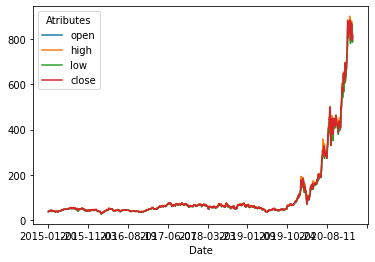

In [13]:
Tickers_DF[ticker_name][map(str.lower,["Open", "High", "Low", "Close"])].plot()
plt.show()

# Extended Companies DB

In [14]:
ticker_name="TSLA"
features = ["open", "high", "low", "close"]
ext_db = Tickers_DF[ticker_name][features]

ext_db.head()

Atributes,open,high,low,close
Date,,,,
2015-01-20,38.773998,38.824001,37.408001,38.386002
2015-01-21,37.910000,39.736000,37.902000,39.313999
2015-01-22,39.400002,40.647999,39.040001,40.324001
2015-01-23,40.057999,40.700001,39.666000,40.257999
2015-01-26,40.366001,41.723999,40.209999,41.310001


In [15]:
coorps = ["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG"]
for coorp in coorps:
  for feat in features:
    ext_db[coorp+'_'+feat] = Tickers_DF[coorp][feat]

df_close = ext_db.pop("close")
ext_db["close"] = df_close
df = ext_db
df

Atributes,open,high,low,ATVI_open,ATVI_high,ATVI_low,ATVI_close,ADBE_open,ADBE_high,ADBE_low,ADBE_close,AMD_open,AMD_high,AMD_low,AMD_close,ALXN_open,ALXN_high,ALXN_low,ALXN_close,ALGN_open,ALGN_high,ALGN_low,ALGN_close,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOG_open,GOOG_high,GOOG_low,GOOG_close,close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.773998,38.824001,37.408001,20.340000,20.340000,19.799999,20.219999,71.790001,71.989998,70.580002,71.489998,2.390000,2.430000,2.190000,2.240000,181.750000,183.250000,177.949997,183.059998,57.090000,57.220001,55.450001,56.240002,512.770020,515.609985,509.369995,509.940002,509.600891,511.096771,504.630524,505.512115,38.386002
2015-01-21,37.910000,39.736000,37.902000,20.110001,20.180000,19.930000,20.100000,71.160004,71.889999,70.370003,71.540001,2.180000,2.450000,2.140000,2.450000,181.960007,183.179993,178.470001,179.259995,56.240002,57.049999,55.669998,55.900002,510.839996,521.849976,509.589996,520.390015,505.861145,517.858215,504.814026,516.621643,39.313999
2015-01-22,39.400002,40.647999,39.040001,20.160000,20.600000,20.049999,20.590000,71.900002,73.650002,70.900002,73.480003,2.420000,2.500000,2.370000,2.470000,180.580002,181.919998,174.570007,180.320007,56.130001,58.110001,55.959999,58.009998,523.000000,538.840027,521.909973,537.299988,520.052185,534.861511,518.277100,532.926819,40.324001
2015-01-23,40.057999,40.700001,39.666000,20.590000,20.830000,20.520000,20.650000,73.440002,74.400002,73.059998,74.059998,2.480000,2.500000,2.430000,2.450000,180.529999,183.369995,180.259995,183.320007,58.029999,58.160000,57.009998,57.459999,538.030029,545.409973,535.750000,541.950012,534.123535,540.685547,531.540649,538.471619,40.257999
2015-01-26,40.366001,41.723999,40.209999,20.650000,20.870001,20.520000,20.840000,72.610001,73.150002,71.680000,72.739998,2.440000,2.640000,2.440000,2.610000,182.960007,183.860001,182.009995,182.759995,57.470001,58.340000,56.660000,58.200001,541.500000,541.500000,532.070007,536.719971,537.055542,537.524231,528.219788,533.744629,41.310001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09,855.119995,859.799988,841.750000,101.949997,103.769997,101.059998,102.730003,495.000000,497.950012,492.010010,496.049988,91.389999,93.300003,90.550003,90.910004,154.509995,155.800003,154.440002,155.270004,601.390015,618.840027,601.390015,615.000000,2074.800049,2098.510010,2070.000000,2075.389893,2078.540039,2105.129883,2078.540039,2083.510010,849.460022
2021-02-10,843.640015,844.820007,800.020020,103.040001,103.440002,101.250000,102.760002,499.170013,499.989990,490.269989,492.670013,91.500000,93.269997,90.459999,92.349998,156.080002,156.630005,154.119995,154.580002,618.070007,618.070007,598.210022,605.780029,2083.139893,2098.879883,2052.239990,2086.479980,2094.209961,2108.370117,2063.090088,2095.379883,804.820007
2021-02-11,812.440002,829.880005,801.729980,103.500000,104.220001,102.550003,103.239998,494.529999,497.000000,491.079987,496.619995,92.900002,93.650002,91.330002,92.660004,154.990005,155.429993,153.589996,154.589996,611.770020,611.770020,591.150024,599.000000,2091.000000,2094.000000,2068.860107,2088.750000,2099.510010,2102.030029,2077.320068,2095.889893,811.659973


## Normalization

In [16]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

1377 153


In [17]:
test

Atributes,open,high,low,ATVI_open,ATVI_high,ATVI_low,ATVI_close,ADBE_open,ADBE_high,ADBE_low,ADBE_close,AMD_open,AMD_high,AMD_low,AMD_close,ALXN_open,ALXN_high,ALXN_low,ALXN_close,ALGN_open,ALGN_high,ALGN_low,ALGN_close,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOG_open,GOOG_high,GOOG_low,GOOG_close,close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-09,279.398010,281.712006,270.256012,79.930000,80.750000,78.820000,80.639999,460.440002,463.799988,451.880005,460.839996,53.520000,57.580002,53.310001,57.259998,108.709999,109.250000,106.239998,108.470001,278.670013,279.809998,268.769989,274.079987,1509.930054,1529.140015,1495.589966,1518.660034,1506.449951,1522.719971,1488.084961,1510.989990,278.855988
2020-07-10,279.200012,309.783997,275.201996,80.720001,81.529999,79.629997,81.269997,460.829987,467.209991,455.480011,466.200012,57.540001,58.150002,55.509998,55.880001,108.379997,109.199997,107.769997,108.820000,273.600006,274.000000,269.929993,273.290009,1513.250000,1541.339966,1500.719971,1539.010010,1506.150024,1543.829956,1496.540039,1541.739990,308.929993
2020-07-13,331.799988,358.997986,294.221985,82.010002,82.050003,77.519997,77.949997,469.769989,470.609985,440.640015,442.470001,56.680000,58.349998,53.380001,53.590000,108.750000,110.320000,106.400002,107.029999,274.929993,279.459991,269.450012,270.239990,1549.939941,1576.359985,1506.560059,1512.229980,1550.000000,1577.131958,1505.243042,1511.339966,299.411987
2020-07-14,311.200012,318.000000,286.200012,76.809998,79.889999,76.209999,79.769997,435.739990,437.209991,416.290009,433.779999,53.299999,54.860001,52.259998,54.720001,106.889999,109.139999,105.669998,108.570000,269.040009,299.959991,267.630005,299.619995,1492.790039,1522.800049,1485.930054,1520.859985,1490.310059,1522.949951,1483.500000,1520.579956,303.359985
2020-07-15,308.600006,310.000000,291.399994,78.519997,79.580002,77.459999,79.150002,434.910004,439.630005,428.730011,433.010010,54.959999,55.369999,53.590000,55.340000,109.059998,111.510002,108.360001,111.129997,303.519989,321.489990,302.000000,314.299988,1523.229980,1536.329956,1497.829956,1516.880005,1523.130005,1535.329956,1498.000000,1513.640015,309.201996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09,855.119995,859.799988,841.750000,101.949997,103.769997,101.059998,102.730003,495.000000,497.950012,492.010010,496.049988,91.389999,93.300003,90.550003,90.910004,154.509995,155.800003,154.440002,155.270004,601.390015,618.840027,601.390015,615.000000,2074.800049,2098.510010,2070.000000,2075.389893,2078.540039,2105.129883,2078.540039,2083.510010,849.460022
2021-02-10,843.640015,844.820007,800.020020,103.040001,103.440002,101.250000,102.760002,499.170013,499.989990,490.269989,492.670013,91.500000,93.269997,90.459999,92.349998,156.080002,156.630005,154.119995,154.580002,618.070007,618.070007,598.210022,605.780029,2083.139893,2098.879883,2052.239990,2086.479980,2094.209961,2108.370117,2063.090088,2095.379883,804.820007
2021-02-11,812.440002,829.880005,801.729980,103.500000,104.220001,102.550003,103.239998,494.529999,497.000000,491.079987,496.619995,92.900002,93.650002,91.330002,92.660004,154.990005,155.429993,153.589996,154.589996,611.770020,611.770020,591.150024,599.000000,2091.000000,2094.000000,2068.860107,2088.750000,2099.510010,2102.030029,2077.320068,2095.889893,811.659973


In [18]:
from sklearn.preprocessing import RobustScaler

f_columns = list(df.columns)[:-1]

f_transformer = MinMaxScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib

In [19]:
close_transformer = MinMaxScaler()
close_transformer = close_transformer.fit(train[['close']])
train.loc[:,'close'] = close_transformer.transform(train[['close']])
test.loc[:,'close'] = close_transformer.transform(test[['close']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Preprocessing

In [20]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [65]:
time_steps = 20

X_train, y_train = create_dataset(train, train.close, time_steps)
X_test, y_test = create_dataset(test, test.close, time_steps)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1357, 20, 32) (1357,)
(133, 20, 32) (133,)


## Model

In [61]:
ext_model = keras.Sequential()
ext_model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
ext_model.add(keras.layers.Dropout(rate=0.2))
ext_model.add(keras.layers.Dense(units=1))
ext_model.compile(loss='mean_squared_error', optimizer='adam')

## Training

In [66]:
history = ext_model.fit(
    X_train, y_train,
    epochs=2000,
    batch_size=64,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/2000
20/20 [==============================] - 0s 10ms/step - loss: 6.6907e-05 - val_loss: 0.0136
Epoch 2/2000
20/20 [==============================] - 0s 8ms/step - loss: 7.3660e-05 - val_loss: 0.0103
Epoch 3/2000
20/20 [==============================] - 0s 8ms/step - loss: 6.7606e-05 - val_loss: 0.0107
Epoch 4/2000
20/20 [==============================] - 0s 7ms/step - loss: 7.8780e-05 - val_loss: 0.0113
Epoch 5/2000
20/20 [==============================] - 0s 8ms/step - loss: 7.9863e-05 - val_loss: 0.0168
Epoch 6/2000
20/20 [==============================] - 0s 7ms/step - loss: 6.7032e-05 - val_loss: 0.0230
Epoch 7/2000
20/20 [==============================] - 0s 7ms/step - loss: 7.2254e-05 - val_loss: 0.0214
Epoch 8/2000
20/20 [==============================] - 0s 7ms/step - loss: 8.3284e-05 - val_loss: 0.0129
Epoch 9/2000
20/20 [==============================] - 0s 7ms/step - loss: 7.2966e-05 - val_loss: 0.0134
Epoch 10/2000
20/20 [==============================] - 0s 7ms/s

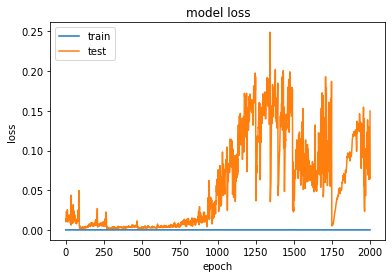

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

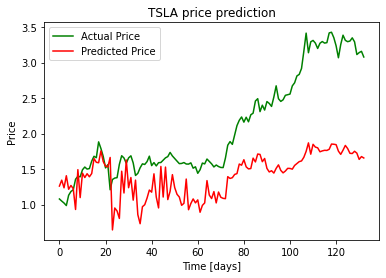

In [68]:
 y_hat = ext_model.predict(X_test)

y_test_inverse = close_transformer.inverse_transform(y_test.reshape(-1,1))
y_hat_inverse = close_transformer.inverse_transform(y_hat)
 
plt.plot(y_test.reshape(-1,1), label="Actual Price", color='green')
plt.plot(y_hat, label="Predicted Price", color='red')
 
plt.title(ticker_name+' price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();